# Análise de amostra de dados do Titanic

A ideia deste projeto é analisar os dados (amostrais) do Titanic, visando identificar padrões das pessoas sobreviventes. Para isso responderemos as perguntas abaixo:

A quantidade de passageiros por Classe?
A quantidade de passageiros da amostra sobreviveram?
A quantidade de passageiros separados por Sexo?
Se há correlação entre o Sexo dos passageiros e a sobrevivência?
Se há correlação entre os passageiros que sobreviveram e a Classe?
Se existem outras correlações?



In [2]:
#bibliotecas utilizadas na realização da análise

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Verificando o conteúdo do arquivo, buscando as 5 primeiras linhas
df = pd.read_csv('titanic-data-6.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Identificando o tamanho do arquivo em colunas e linhas
print('O arquivo possui {0} linhas e {1} colunas.'.format(
df.shape[0], df.shape[1]))

O arquivo possui 891 linhas e 12 colunas.


In [4]:
#Validando se tem valor faltante
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [5]:
#Validando se tem linha duplicada
print('Este arquivo possui {} linhas duplicadas'. format(df.duplicated().sum()))


Este arquivo possui 0 linhas duplicadas


In [6]:
#Validando a quantidade de valores únicos por coluna
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
#Substituindo os nomes das colunas para melhorar a visualização
df.rename(columns={'Pclass': 'Classe', 'Name': 'Nome', 'Sex':'Sexo', 
                   'Age':'Idade', 'SibSp':'Rel_Familiar', 'Parch':'Rel_Familiar2', 
                   'Fare':'Tarifa', 'Cabin':'Numero_Cabine', 
                   'Embarked':'Porto_de_Embarque'}, inplace=True)

In [8]:
#Validando as substituções dos nomes das colunas
df.head(0)

,PassengerId,Survived,Classe,Nome,Sexo,Idade,Rel_Familiar,Rel_Familiar2,Ticket,Tarifa,Numero_Cabine,Porto_de_Embarque


In [9]:
# Validando o tipo de dado de cada coluna
df.dtypes

PassengerId            int64
Survived               int64
Classe                 int64
Nome                  object
Sexo                  object
Idade                float64
Rel_Familiar           int64
Rel_Familiar2          int64
Ticket                object
Tarifa               float64
Numero_Cabine         object
Porto_de_Embarque     object
dtype: object

In [10]:
#Validando se as colunas possuem itens faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId          891 non-null int64
Survived             891 non-null int64
Classe               891 non-null int64
Nome                 891 non-null object
Sexo                 891 non-null object
Idade                714 non-null float64
Rel_Familiar         891 non-null int64
Rel_Familiar2        891 non-null int64
Ticket               891 non-null object
Tarifa               891 non-null float64
Numero_Cabine        204 non-null object
Porto_de_Embarque    889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
#Na coluna Idade que possui dados faltantes, apliquei a média
#Em seguida validei se o ajuste foi concluído
mean = df['Idade'].mean()
df['Idade'].fillna(mean,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId          891 non-null int64
Survived             891 non-null int64
Classe               891 non-null int64
Nome                 891 non-null object
Sexo                 891 non-null object
Idade                891 non-null float64
Rel_Familiar         891 non-null int64
Rel_Familiar2        891 non-null int64
Ticket               891 non-null object
Tarifa               891 non-null float64
Numero_Cabine        204 non-null object
Porto_de_Embarque    889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
#Em seguida, apliquei as strings 'Não_Informado' para nos campos vazios numero da cabine e porto de embarque.
df['Numero_Cabine'].fillna('Não_Informado', inplace=True)
df['Porto_de_Embarque'].fillna('Não_Informado', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId          891 non-null int64
Survived             891 non-null int64
Classe               891 non-null int64
Nome                 891 non-null object
Sexo                 891 non-null object
Idade                891 non-null float64
Rel_Familiar         891 non-null int64
Rel_Familiar2        891 non-null int64
Ticket               891 non-null object
Tarifa               891 non-null float64
Numero_Cabine        891 non-null object
Porto_de_Embarque    891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [13]:
#Validando se há linha duplicada e concluí que não havia, pois todos os valores retornaram False
df.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
861    False
862    False
863    False
864    False
865    False
866    False
867    False
868    False
869    False
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878    False
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [14]:
#Em seguida validei se os ajustes foram aplicados
df.head()

,PassengerId,Survived,Classe,Nome,Sexo,Idade,Rel_Familiar,Rel_Familiar2,Ticket,Tarifa,Numero_Cabine,Porto_de_Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Não_Informado,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Não_Informado,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Não_Informado,S


Abaixo está o conteúdo da análise elaborara para responder às perguntas citadas acima.

In [15]:
#Calculando a média, a menor e a maior idade dos passageiros

print('Idade média:{0:.1f}, Mais novo:{1}, Mais Velho:{2}'.format
      (df['Idade'].mean(), df['Idade'].min(), df['Idade'].max()))

Idade média:29.7, Mais novo:0.42, Mais Velho:80.0


In [16]:
# Qual a quantidade  e o percentual de passageiros da amostra sobreviveram?

# Validando a amostra, percebi que apenas 38,4% dos passageiros e tripulantes sobreviveram.

b = df.groupby('Survived').count()
print(b)

          PassengerId  Classe  Nome  Sexo  Idade  Rel_Familiar  Rel_Familiar2  \
Survived                                                                        
0                 549     549   549   549    549           549            549   
1                 342     342   342   342    342           342            342   

          Ticket  Tarifa  Numero_Cabine  Porto_de_Embarque  
Survived                                                    
0            549     549            549                549  
1            342     342            342                342  


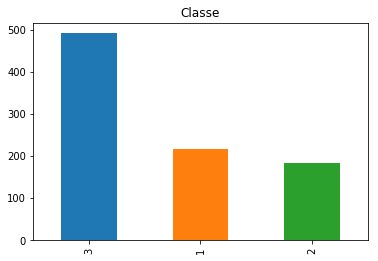

In [17]:
#O gráfico abaixo apresenta visualmente a quantidade de passageiros separados por 'Classe'
#Identifiquei que a Classe 3 possui praticamente o valor das classes 1 e 2 somadas.
#Assim como, a diferença entre quantidade de passageiros entre a classe 1 e 2 é irrisória.

df['Classe'].value_counts().plot(kind='bar', title='Classe');


In [18]:
# Abaixo analiso a quantidade de passageiros separados por Classe, visando entender se houve alguma distinção
# em relação aos salvamentos.


a = df.groupby('Classe').count()
print(a)

        PassengerId  Survived  Nome  Sexo  Idade  Rel_Familiar  Rel_Familiar2  \
Classe                                                                          
1               216       216   216   216    216           216            216   
2               184       184   184   184    184           184            184   
3               491       491   491   491    491           491            491   

        Ticket  Tarifa  Numero_Cabine  Porto_de_Embarque  
Classe                                                    
1          216     216            216                216  
2          184     184            184                184  
3          491     491            491                491  


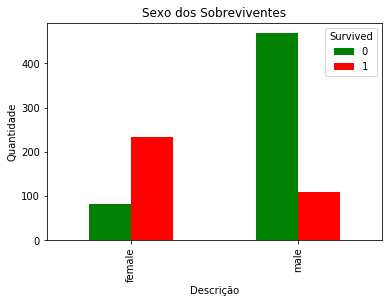

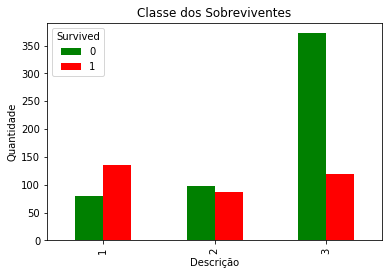

In [29]:
# Nos gráficos abaixo é possível perceber que em número absoluto e em proporção tiveram mais mulheres sobreviventes
# Assim como, no segundo gráfico, comparando sobreviventes por classe sociais, que nao houve distição entre classes.

def graficos (x, y, t):
    '''Define quais parametros serao necessários comparar criando gráficos com titulos'''
    
    table = pd.crosstab(df[x],df[y])
    table.plot(kind='bar',width=0.5, color=['green','red'], title = t ,grid=False)
    plt.xlabel('Descrição')
    plt.ylabel('Quantidade')
graficos('Sexo','Survived','Sexo dos Sobreviventes')
graficos('Classe','Survived','Classe dos Sobreviventes')
    
    

In [20]:
# A tabela abaixo visa apresentar quantos passageiros de cada sexo possuem na amostra.
# Identifiquei também que 64,8% dos passageiros eram do sexo masculino
# E apenas 35.2% era do sexo feminino.

c = df.groupby('Sexo').count()
print(c)

        PassengerId  Survived  Classe  Nome  Idade  Rel_Familiar  \
Sexo                                                               
female          314       314     314   314    314           314   
male            577       577     577   577    577           577   

        Rel_Familiar2  Ticket  Tarifa  Numero_Cabine  Porto_de_Embarque  
Sexo                                                                     
female            314     314     314            314                314  
male              577     577     577            577                577  


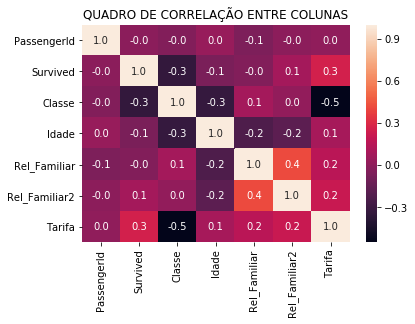

In [31]:
# Buscando outras correlações, fica claro que excluindo o sexo, os demais itens possuem correlações baixas
# entretanto, visualizando as relações familiares descritas no dicionario dos dados, percebe-se que são os valores são mais relevantes
# chegando ao indicador de 0.4, seguido por 0.3 da relação entre sobrevivencia X tarifa - que acredito ser por conta da 
# proporção.

sns.heatmap(df.corr(), annot=True, fmt=".1f")
plt.title('QUADRO DE CORRELAÇÃO ENTRE COLUNAS')
plt.show()

Conclusão:

Com base na amostra disponibilizada, que representa 68% do total real de passageiros e tripulantes do navio Titanic, podemos concluir que trata-se de uma amostra considerável e que permite concluir fatores com pouco nível de risco. Além disso, foi necessário efetuar alguns ajustes na base para realizar uma análise mais concisa.

Os principais fatores ajustados na planilha da amostra foram:
    1. Aplicação da média de idade nas linhas faltantes, visando reduzir a discrepância entre as idades;
    2. Aplicação da string 'não_informado' nas linhas faltantes dos campos 'Porto de Embarque' e 'Cabine', que foram refutados nesta análise.
    

Para a análises efetuada, foi possível perceber que a classe 3 foi a que teve maior quantidade de passageiros no total, sendo praticamente a soma das classes 1 e 2, sendo 891 passageiros e tripulantes na amostra total.

Da amostra total, visualizamos que:
    64,8% de homens e 35,2% de mulheres de pessoas;
    38,4% de sobreviventes, sendo as mulheres em sua grande maioria;
    a classe não possui relação com os sobreviventes.

Com base nesta análise, percebemos que o código Maritimo que diz que deve-se salvar mulheres e crianças primeiro, foi cumprido parcialmente, pois seria necessário análisar a amostra por idade para ser totalmente cumprido.

    


    